# 4.1 데이터셋

B- : 개체명의 시작

I- : 동일한 개체명에 속해 연속되는 토큰

O  : 어떤 개체명에도 속하지 않음


In [1]:
from datasets import get_dataset_config_names

xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME 서브셋 개수: {len(xtreme_subsets)}")

XTREME 서브셋 개수: 183


In [2]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets[:3]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

In [3]:
#Load German corpus
from datasets import load_dataset

load_dataset("xtreme", name="PAN-X.de")

Found cached dataset xtreme (C:/Users/jiyou/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [4]:
from collections import defaultdict
from datasets import DatasetDict

langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]
#if don't have any key, return DatasetDict
panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
    #load multi language corpus
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
    #Downsampling each split with language proportion and mix
    for split in ds:
        panx_ch[lang][split] = (
            ds[split]
            .shuffle(seed=0)
            .select(range(int(frac * ds[split].num_rows)))
        )

Found cached dataset xtreme (C:/Users/jiyou/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-e5ddf09f1ae095ec.arrow
Loading cached shuffled indices for dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-25e7e2dd003d0fa6.arrow
Loading cached shuffled indices for dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-73a95bc0accfea8b.arrow
Found cached dataset xtreme (C:/Users/jiyou/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-6ff29513007ec78b.arrow
Loading cached shuffled indices for dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-c5c9a4fc19dfd7d6.arrow
Loading cached shuffled indices for dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.fr\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-9711ab25936b81b7.arrow
Found cached dataset xtreme (C:/Users/jiyou/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.it\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-daa9a1770078307c.arrow
Loading cached shuffled indices for dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.it\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-5e244c05031bab3c.arrow
Loading cached shuffled indices for dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.it\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-497ee15c12bff58d.arrow
Found cached dataset xtreme (C:/Users/jiyou/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-757845faa9fa6949.arrow
Loading cached shuffled indices for dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-305cefc7ffa49fd9.arrow
Loading cached shuffled indices for dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.en\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-e5ec5e6ba7c1237d.arrow


In [5]:
import pandas as pd

pd.DataFrame({lang: [panx_ch[lang]["train"].num_rows] for lang in langs}, index=["Number of training examples"])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


In [6]:
element = panx_ch["de"]["train"][0]
for key, value in element.items():
    print(f"{key}: {value}")

tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [7]:
for key, value in panx_ch["de"]["train"].features.items():
    print(f"{key}: {value}")

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags: Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [8]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature
print(tags)

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)


In [9]:
def create_tag_names(batch):
    return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}

panx_de = panx_ch["de"].map(create_tag_names)

Loading cached processed dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-aa23e79447eff40d.arrow
Loading cached processed dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-f9488d5762d11017.arrow
Loading cached processed dataset at C:\Users\jiyou\.cache\huggingface\datasets\xtreme\PAN-X.de\1.0.0\29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4\cache-ddc8b7b55cfc03a8.arrow


In [10]:
de_example = panx_de["train"][0]
pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]], ['Tokens', "Tags"])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [11]:
#개체명의 빈도
from collections import Counter

split2freqs = defaultdict(Counter)
for split, dataset in panx_de.items():
    for row in dataset["ner_tags_str"]:
        for tag in row:
            if tag.startswith("B"):
                tag_type = tag.split("-")[1]
                split2freqs[split][tag_type] += 1          
pd.DataFrame.from_dict(split2freqs, orient="index")

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


# 4.2 다중 언어 트랜스포머

다중 언어 트랜스포머가 평가하는 방식
1. en: 영어 훈련 데이터에서 미세 튜닝 후 각 언어의 테스트 세트에서 평가
2. each: 단일 언어의 테스트 세트에서 미세 튜닝하고 평가
3. all: 모든 훈련 데이터에서 미세 튜닝해 각 언어의 테스트 세트에서 평가

# 4.3 XLM-R 토큰화

In [12]:
#load tokenizers from bert and xlm-R to compare
from transformers import AutoTokenizer

bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

In [13]:
text = "Jack Sparrow loves New York!"
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

In [14]:
df = pd.DataFrame([bert_tokens, xlmr_tokens], index=["BERT", "XLM-R"])
df

,0,1,2,3,4,5,6,7,8,9
BERT,[CLS],Jack,Spa,##rrow,loves,New,York,!,[SEP],None
XLM-R,<s>,▁Jack,▁Spar,row,▁love,s,▁New,▁York,!,</s>


## 4.3.1 토큰화 파이프라인

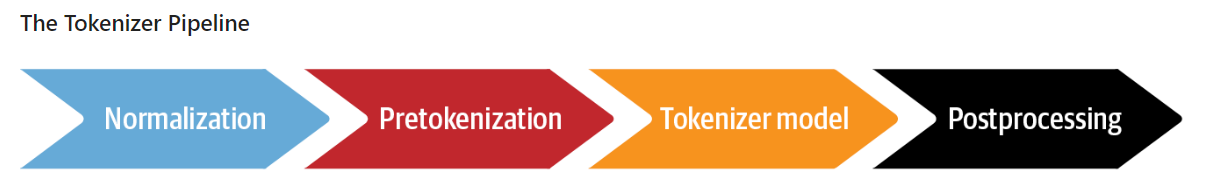

1. 정규화
    1. 원시 문자열을 깨끗하게 가공 -> 공백, 악센트 붙은 문자 제거 작업 등
    2. 정규화의 종류
        1. 유니코드 정규화 -> 같은 문자를 쓰는 여러 방식을 표준 형식으로 대체
        2. 소문자로 바꾸기
2. 사전 토큰화
    1. 텍스트를 더 작은 객체로 분할하며 훈련 마지막에 생성되는 토큰의 상한선을 제공
    2. 사전 토큰화가 텍스트를 단어로 분할하고 최종 토큰은 이 단어의 일부가 됨
3. 토크나이저 모델
    1. 토크나이저를 사용해 부분단어 분할 모델을 단어에 적용(토크나이저는 파이프라인에서 말뭉치로 훈련이 필요한 부분)
    2. 문자열 리스트가 아닌 정수(입력 ID) 리스트를 가지게 됨
4. 사후 처리
    1. 토큰 리스트에 부가적 변환 ex. 입력 토큰 인덱스의 시퀀스 처음과 끝에 특수 토큰 추가

## 4.3.2 SentencePiece 토크나이저

1. 유니그램이라는 부분단어 분할 방식을 기반으로 각 입력 텍스트를 유니코드 문자 시퀀스로 인코딩
2. 토큰화된 텍스트에 공백을 보존하기 때문에 정확하게 원시 텍스트로 다시 변환

In [15]:
"".join(xlmr_tokens).replace(u"\u2581", " ")

'<s> Jack Sparrow loves New York!</s>'

# 4.4 개체명 인식을 위한 트랜스포머

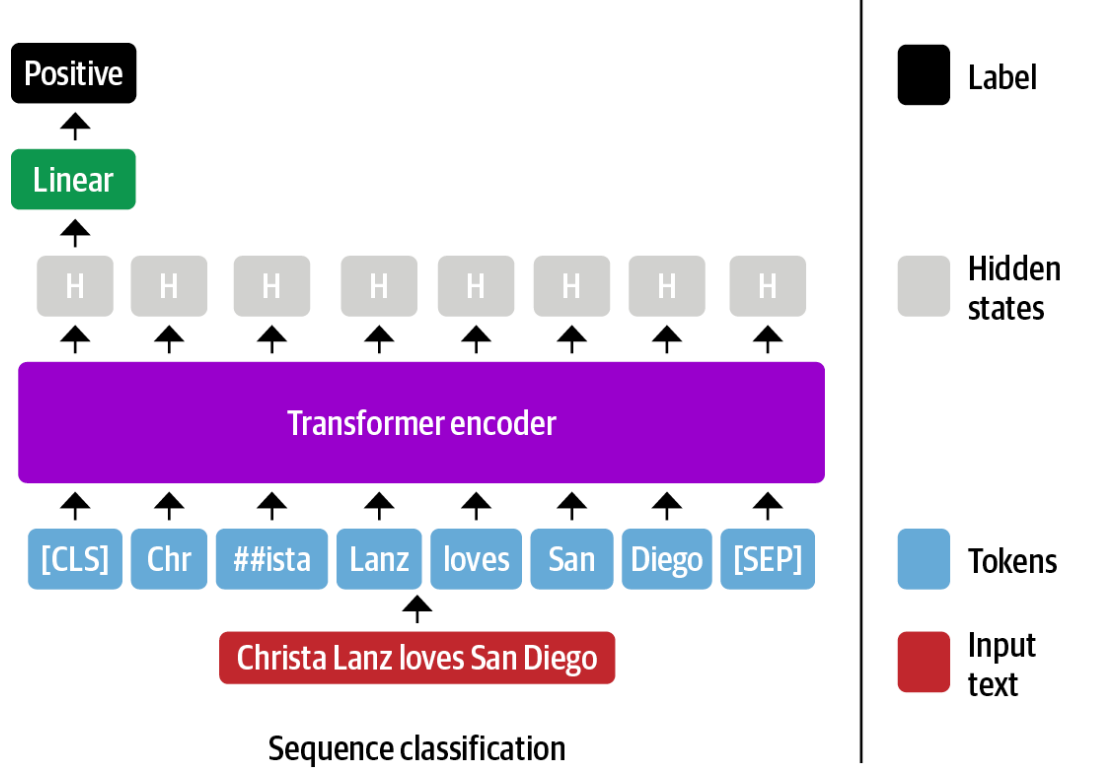
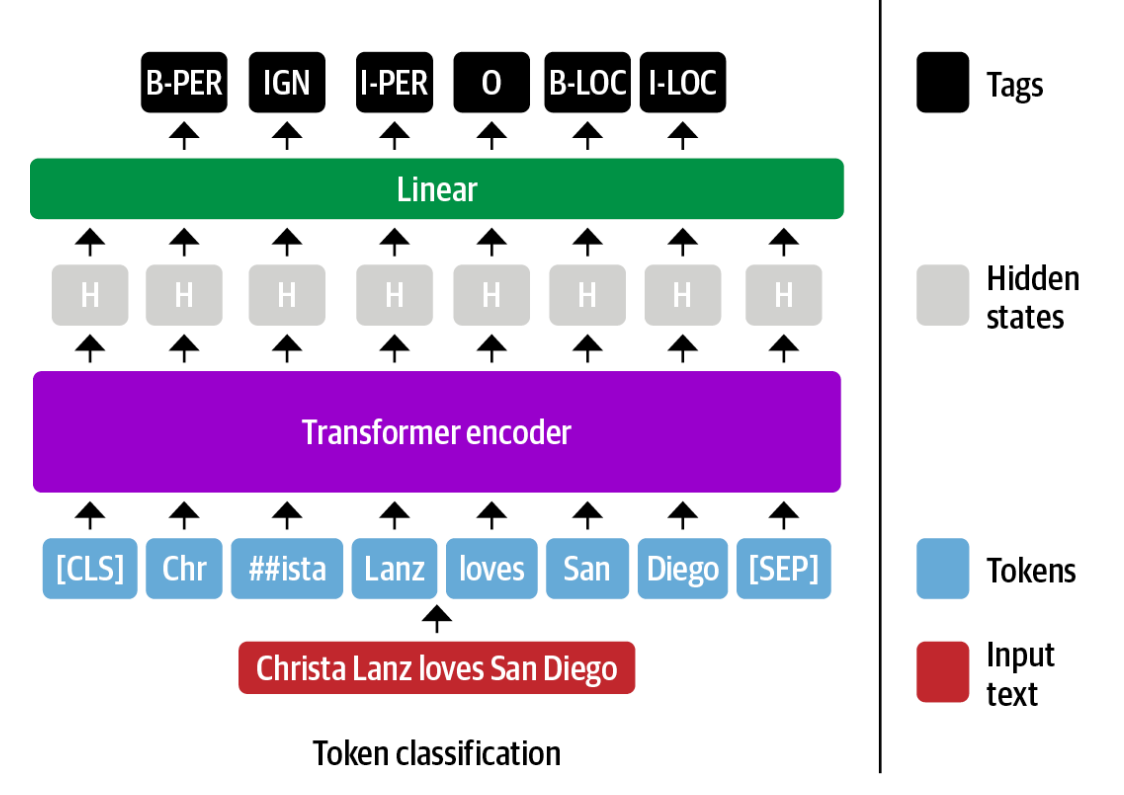

# 4.5 트랜스포머 모델 클래스

## 4.5.1 바디와 헤드

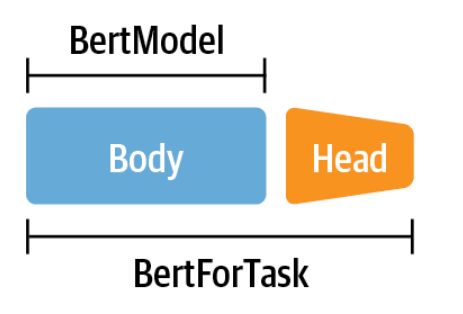

## 4.5.2 토큰 분류를 위한 사용자 정의 모델 만들기

In [16]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig
    
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        #Load Model Body
        self.roberta = RobertaModel(config, add_pooling_layer=False)
        #Prepare Token Classification Token
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_lables)
        #Load weights and reset
        self.init_weights()
        
    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, lables=None, **kwargs):
        #Using model Body, get encoder expression
        outputs = self.roberta(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, **kwargs)
        #Pass Encoder Expression to head
        sequence_output = self.dropout(outputs[0])
        logits = self.classifier(sequence_output)
        #calculate loss
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        #return model print
        return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states, attentions=outputs.attentions)

## 4.5.3 사용자 정의 모델 로드하기

In [17]:
#각 개체명을 레이블링하는 데 사용할 태그, 각 태그를 ID로 매핑하는 딕셔너리와 그 반대로 매핑하는 딕셔너리
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

In [ ]:
from transformers import AutoConfig

xlmr_config = AutoConfig.from_pretrained(xlmr_model_name, num_labels=tags.num_classes, id2label=index2tag, label2id=tag2index)